In [1]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-04-13 10:52:43--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.156.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.156.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-04-13 10:52:44 (40.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [72]:
df = pd.read_csv('moore.csv',header=None)
df.head(10)

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100
5,1974,4500
6,1974,8000
7,1975,3510
8,1976,5000
9,1976,8500


In [43]:
data = df.values
x=data[:,0].reshape(-1,1)
y=data[:,1]
type(data)

numpy.ndarray

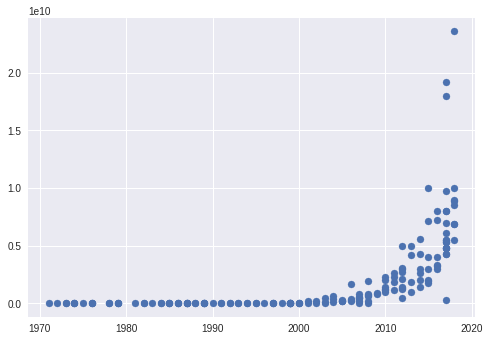

In [44]:
#Here its a exponetial problem
plt.style.use('seaborn')
plt.Figure(figsize=(16,8))
plt.scatter(x,y)
plt.show()

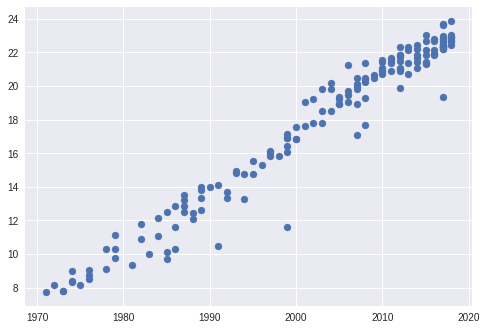

In [45]:
#after applying log its a linear problem
plt.style.use('seaborn')
plt.Figure(figsize=(16,8))
plt.scatter(x,np.log(y))
plt.show()

In [46]:
#Lets scale the feature to make it small
X = x-x.mean() 
Y = np.log(y)

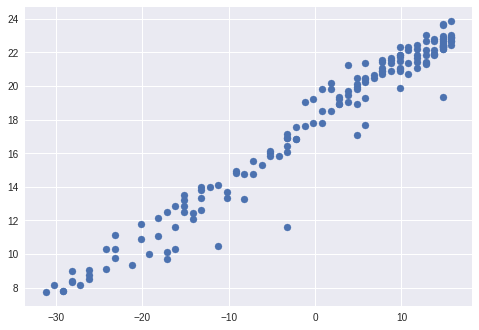

In [47]:
#after applying log its a linear problem
plt.style.use('seaborn')
plt.Figure(figsize=(16,8))
plt.scatter(X,Y)
plt.show()

In [48]:
#Lets build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [49]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),
             loss='mse')

In [50]:
#lets build a learning rate scheduler
def lr_scheduler(epochs,lr):
    if epochs>=50:
        return 0.0001
    return 0.001

In [51]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule=lr_scheduler)

In [52]:
hist = model.fit(X,Y,
                 epochs=200,
                 callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 1s 7ms/sample - loss: 350.1345
Epoch 2/200
162/162 [==============================] - 0s 169us/sample - loss: 409.5365
Epoch 3/200
162/162 [==============================] - 0s 283us/sample - loss: 297.5289
Epoch 4/200
162/162 [==============================] - 0s 130us/sample - loss: 201.8009
Epoch 5/200
162/162 [==============================] - 0s 216us/sample - loss: 210.6783
Epoch 6/200
162/162 [==============================] - 0s 155us/sample - loss: 198.0258
Epoch 7/200
162/162 [==============================] - 0s 186us/sample - loss: 164.9900
Epoch 8/200
162/162 [==============================] - 0s 158us/sample - loss: 89.0018
Epoch 9/200
162/162 [==============================] - 0s 214us/sample - loss: 86.1601
Epoch 10/200
162/162 [==============================] - 0s 165us/sample - loss: 56.7982
Epoch 11/200
162/162 [==============================] - 0s 177us/sample - loss: 42.7041
Epoch 12/200
16

162/162 [==============================] - 0s 113us/sample - loss: 0.8685
Epoch 95/200
162/162 [==============================] - 0s 160us/sample - loss: 0.8961
Epoch 96/200
162/162 [==============================] - 0s 141us/sample - loss: 0.8768
Epoch 97/200
162/162 [==============================] - 0s 143us/sample - loss: 0.8751
Epoch 98/200
162/162 [==============================] - 0s 135us/sample - loss: 0.8824
Epoch 99/200
162/162 [==============================] - 0s 112us/sample - loss: 0.8872
Epoch 100/200
162/162 [==============================] - 0s 126us/sample - loss: 0.8775
Epoch 101/200
162/162 [==============================] - 0s 174us/sample - loss: 0.8739
Epoch 102/200
162/162 [==============================] - 0s 176us/sample - loss: 0.8839
Epoch 103/200
162/162 [==============================] - 0s 182us/sample - loss: 0.9074
Epoch 104/200
162/162 [==============================] - 0s 180us/sample - loss: 0.8974
Epoch 105/200
162/162 [============================

162/162 [==============================] - 0s 130us/sample - loss: 0.8704
Epoch 188/200
162/162 [==============================] - 0s 163us/sample - loss: 0.8716
Epoch 189/200
162/162 [==============================] - 0s 143us/sample - loss: 0.8723
Epoch 190/200
162/162 [==============================] - 0s 126us/sample - loss: 0.8709
Epoch 191/200
162/162 [==============================] - 0s 156us/sample - loss: 0.8718
Epoch 192/200
162/162 [==============================] - 0s 112us/sample - loss: 0.8724
Epoch 193/200
162/162 [==============================] - 0s 127us/sample - loss: 0.8778
Epoch 194/200
162/162 [==============================] - 0s 132us/sample - loss: 0.8764
Epoch 195/200
162/162 [==============================] - 0s 165us/sample - loss: 0.8722
Epoch 196/200
162/162 [==============================] - 0s 126us/sample - loss: 0.8813
Epoch 197/200
162/162 [==============================] - 0s 129us/sample - loss: 0.8843
Epoch 198/200
162/162 [=======================

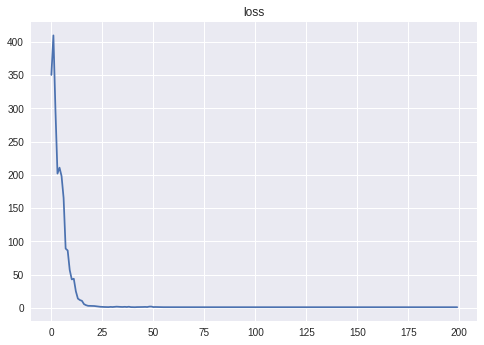

In [53]:
#plotting the loss
plt.style.use('seaborn')
plt.title('loss')
plt.plot(hist.history['loss'])


In [54]:
#getting the slop of the line
print(model.layers)
print(model.layers[0].get_weights())


[array([[0.3341153]], dtype=float32), array([17.76507], dtype=float32)]


In [57]:
a = model.layers[0].get_weights()[0][0,0]

#we need to find rate of change r
log C = log r * log t  + log A
y = ax+b
y = log C,a = log r,x = log t,b = log A

a we found = 0.3341
exp(a) = 105

In [58]:
np.exp(a)

1.3967042

#solve for time t
time take for counter to double C -> 2C is t'

    2C = A0 + r^t'   -> (1)
    C = A0 + r^t     -> (2)

(1)/(2) 2C/C = A0 +r^t'/A0 + r^t

        2 = r ^(t'-t)
        
        let log it
        
        log 2 = log r * (t'-t)
        
        (t'-t) = log 2/log r

In [59]:
print("time for transitor to double-->",np.log(2)/a)

time for transitor to double--> 2.074574817761514


In [60]:
#Analytical sol without model
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.34168248738731316 17.764939393631764
Time to double: 2.0286295205239195


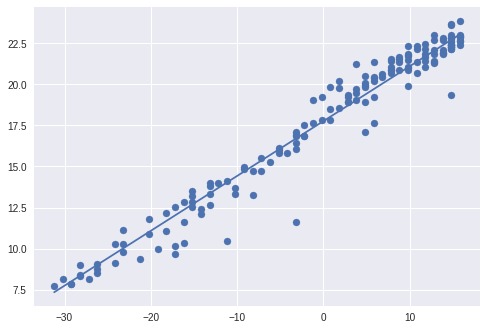

In [61]:
#make prediction
yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,yhat)


In [73]:
year = 1975
mean_year = year-x.mean()
mean_year

-27.19753086419746

In [74]:
res = model.predict([mean_year])

In [75]:
np.exp(res[0,0])

5872.0464